# Practical Exam: Pet Box Subscription

### **Instructions**
- Use any tools that you are comfortable with to perform the tasks required (for example Tableau, Power BI, MS Excel, Python, R).
- Write your solutions in the workspace provided from your certification page.
- Include all of the visualizations you create to complete the tasks.
- Visualizations must be visible in the published version of the workspace. Links to external visualizations will not be accepted.
- You do not need to include any code.
- You must pass all criteria to pass this exam. The full criteria can be found

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



# Case Study

### Background
PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

### Data
The dataset contains the sales records in the stores last year.
The dataset can be downloaded from [here](https://s3.amazonaws.com/talent-assets.datacamp.com/pet_supplies_2212.csv).

### Tasks
Submit your answers directly in the workspace provided.
1. For every column in the data:
    a. State whether the values match the description given in the table above.
    b. State the number of missing values in the column.
    c. Describe what you did to make values match the description if they did not match.
2. Create a visualization that shows how many products are repeat purchases. Use the visualization to:
    a. State which category of the variable repeat purchases has the most observations
    b. Explain whether the observations are balanced across categories of the variable repeat purchases
3. Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.
4. Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship

## Task 1: Data Validation and Description



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
petbox_data = pd.read_csv('pet_supplies_2212.csv')

petbox_data.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [24]:
petbox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [25]:
petbox_data.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [26]:
petbox_data['rating'] = petbox_data['rating'].fillna(0)

In [27]:
petbox_data.isna().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [28]:
petbox_data['size'] = petbox_data['size'].str.lower()

In [29]:
petbox_data.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,996.597847,4.492000,0.604000
std,433.157015,323.952676,2.105443,0.489228
min,1.000000,286.940000,0.000000,0.000000
25%,375.750000,747.420000,3.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [30]:
productids_count = petbox_data['product_id'].nunique()


category_list = petbox_data['category'].unique()
category_count = petbox_data['category'].nunique()

animal_list = petbox_data['animal'].unique()
animal_count = petbox_data['animal'].nunique()

size_list = petbox_data['size'].unique()
size_count = petbox_data['size'].nunique()

print(productids_count)

print(category_count, [category_list])
print(animal_count, [animal_list])
print(size_count, [size_list])

1500
7 [array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)]
4 [array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)]
3 [array(['large', 'medium', 'small'], dtype=object)]


In [31]:
petbox_data['category'] = petbox_data['category'].replace('-', "Unknown")
category_list = petbox_data['category'].unique()

print(category_list)

['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown']


In [32]:
petbox_data['sales'] = round(petbox_data['sales'], 2)

petbox_data.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,medium,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1


In [33]:
petbox_data['price'] = pd.to_numeric(petbox_data['price'], errors='coerce')
petbox_data['price'] = round(petbox_data['price'], 2)

petbox_data.head()

petbox_data.isna().sum()

product_id           0
category             0
animal               0
size                 0
price              150
sales                0
rating               0
repeat_purchase      0
dtype: int64

In [34]:
petbox_data.describe()


,product_id,price,sales,rating,repeat_purchase
count,1500.000000,1350.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,29.424304,996.597847,4.492000,0.604000
std,433.157015,7.720880,323.952676,2.105443,0.489228
min,1.000000,12.850000,286.940000,0.000000,0.000000
25%,375.750000,24.745000,747.420000,3.000000,0.000000
50%,750.500000,28.065000,1000.830000,5.000000,1.000000
75%,1125.250000,33.965000,1158.157500,6.000000,1.000000
max,1500.000000,54.160000,2255.960000,9.000000,1.000000


In [35]:
petbox_data['price'] = petbox_data['price'].fillna(28.065)

In [36]:
petbox_data.isna().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

In [37]:
petbox_data.head(10)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.10,1860.62,7.0,1
1,2,Housing,Bird,medium,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,small,26.18,832.63,7.0,1
5,6,Housing,Dog,small,30.77,874.58,7.0,0
6,7,Housing,Dog,small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.90,1074.31,4.0,0
8,9,Equipment,Fish,medium,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


The original data has **1500 rows** and **8 columns**. 
I did not remove any rows.
Firstly, I checked for missing values and only the **rating** column had **150 missing values** which I replaced with **0** as stated in the data set description.
In the **category** column I replaced the **'-'** object with **"Unknown"** as stated in the data set description now we have 7 unique values ('Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown'). 
In the **size** column I noticed some of the values' case were not consistent. Hence, I changed all the values in the column to lowercase.
The **price** column was not in numeric format, I changed the column values to numeric. I found another 150 missing values in the price column and replaced them with the median price. Lastly, I rounded the price values to 2 decimal places.
In the **sales** column I rounded the values to 2 decimal places.

Looking at the rest of the columns after validation:-
- The **product_id** column has 1500 unique values as expected.  
- The **animal** column has 4 unique values; Bird, Dog, Cat and Fish as expected.
- The **rating** column has values that were between 0 and 10 as expected.
- The **repeat_purchase** column has two options of 0 or 1 as expected.

## Task 2: Repeat and Non-Repeat Purchases Observation

**Here I used bar chart to count the number products that repeat and non-repeat purchase using the repeat_purchase column in the petbox_data.**

Text(0.5, 1.0, 'Count of Repeat and Non-Repeat Purchases by Products')

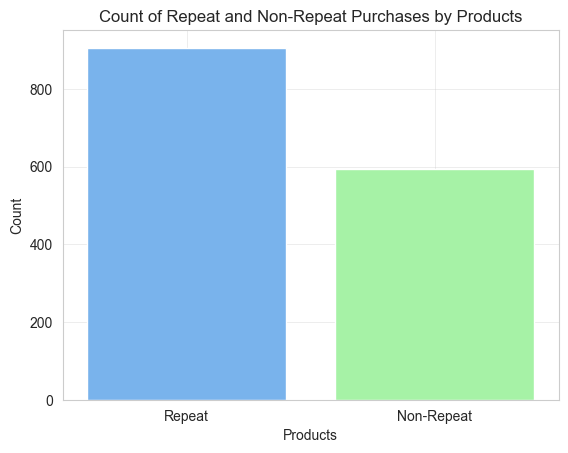

In [38]:
# Count the number of repeat purchases by product_id
repeat_counts = petbox_data.groupby('product_id')["repeat_purchase"].sum().reset_index()

# Create a countplot to visualize the number of repeat purchases
ax = sns.countplot(x="repeat_purchase", data=repeat_counts,
                  order=[1, 0],
                  palette =['#66b3ff','#99ff99'])
ax.grid(True, linewidth=0.5, alpha=0.5)
ax.set_xticklabels(["Repeat", "Non-Repeat"])
ax.set_xlabel("Products")
ax.set_ylabel("Count")
ax.set_title("Count of Repeat and Non-Repeat Purchases by Products")

**The pie chart shows the proportion of the products that are repeat and non-repeat purchase.**

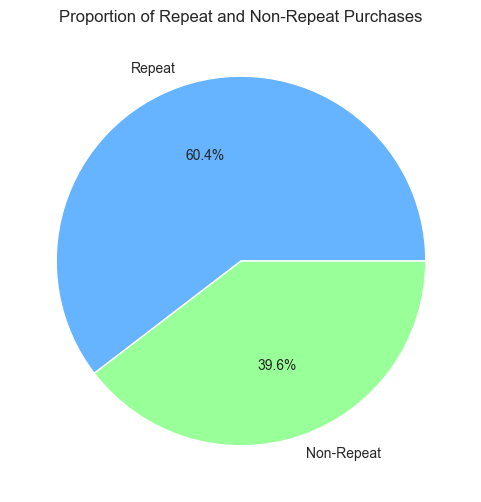

In [39]:
# Create the pie chart using seaborn
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")

petbox_data["repeat_purchase"].value_counts().plot(kind="pie",
                                                   labels=['Repeat', 'Non-Repeat'],
                                                   autopct='%1.1f%%',
                                                   colors=['#66b3ff','#99ff99'])

# Set the chart properties
plt.ylabel("")
plt.title("Proportion of Repeat and Non-Repeat Purchases")

# Show the chart
plt.show()


a. From the above, we can see that there is a significant difference in products that were repeat purchases to non-repeat purchases of over 900 sales. The company may continue with the strategy based on this. But may also want to conduct further analysis to know the products' category that are repeatedly purchased in order to target for increase sale. 

b. The non-repeat purchases were less than half of the products sold and over 60% of all purchases were repeated purchases. This is a significant difference.

## Task 3: Sales Distribution

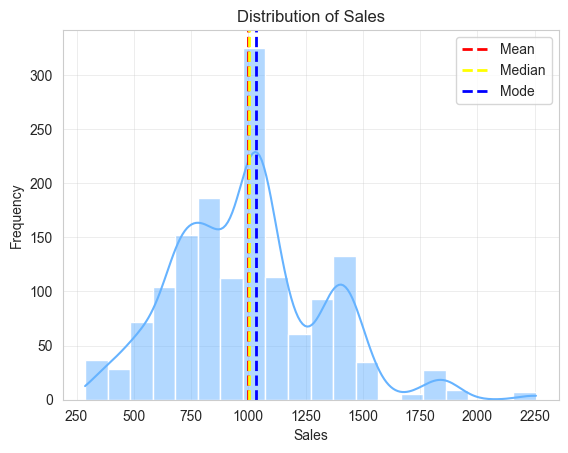

In [40]:
# Create a histogram with kde plot
sns.histplot(data=petbox_data, x="sales", bins=20, kde=True, color='#66b3ff')

# Add vertical lines for the mean, median, and mode
mean = petbox_data["sales"].mean()
median = petbox_data["sales"].median()
mode = petbox_data["sales"].mode()[0]
plt.axvline(mean, color="red", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(median, color="yellow", linestyle="dashed", linewidth=2, label="Median")
plt.axvline(mode, color="blue", linestyle="dashed", linewidth=2, label="Mode")

# Set the chart properties
plt.grid(True, linewidth=0.5, alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.legend()
plt.show()

This shows that there are more lower sales values and fewer higher sales values. This means that majority of the sales (mode) of the products fall below the mean and there are few high sales. The mean is also larger than the median. What this may mean for sales is that it is not increasing regardless of high repeated purchases. Although there is more repeated purchase it is does not account for higher sales of products. Sales performance are low and there is potential need for improvement and growth.

## Task 4: Relationship Between Sales and Repeat and Non-Repeat Purchases

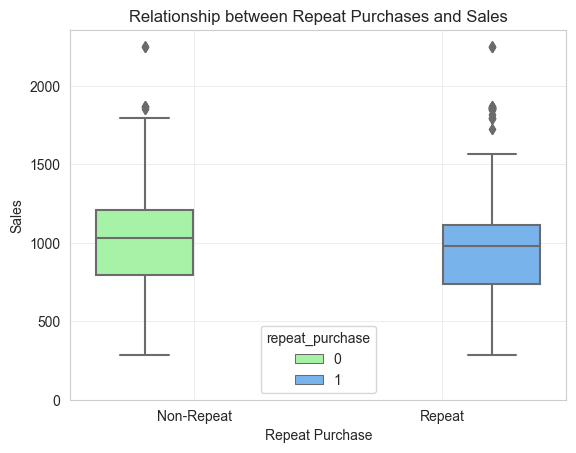

In [41]:

# Create the box plot using seaborn
colors = ['#99ff99', '#66b3ff']
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(x="repeat_purchase", y="sales", data=petbox_data, hue="repeat_purchase")

# Set the chart properties
ax.set_xticklabels(["Non-Repeat", "Repeat"])
ax.grid(True, linewidth=0.5, alpha=0.5)
plt.ylim(bottom=0)
plt.xlabel("Repeat Purchase")
plt.ylabel("Sales")
plt.title("Relationship between Repeat Purchases and Sales")

# Show the chart
plt.show()

In [42]:
from scipy import stats

# Extract the Sales column for Repeat and Non-Repeat purchases
repeat_sales = petbox_data.loc[petbox_data["repeat_purchase"] == 1, "sales"]
non_repeat_sales = petbox_data.loc[petbox_data["repeat_purchase"] == 0, "sales"]

# Calculate z-scores for the repeat sales data
repeat_z_scores = stats.zscore(repeat_sales)

# Calculate absolute z-scores for the repeat sales data
repeat_abs_z_scores = np.abs(repeat_z_scores)

# Set threshold for outliers
outlier_threshold = 3

# Identify the outliers in the repeat sales data
repeat_outliers = repeat_sales[repeat_abs_z_scores > outlier_threshold]

# Print the repeat sales outliers
print("Repeat Sales Outliers:", repeat_outliers)

# Perform a t-test to determine if the repeat sales outliers are significantly different from the rest of the repeat sales data
t_statistic, p_value = stats.ttest_1samp(repeat_outliers, np.mean(repeat_sales))

# Print the results of the t-test
print("T-statistic for Repeat Sales Outliers:", t_statistic)
print("P-value for Repeat Sales Outliers:", p_value)

Repeat Sales Outliers: 448     2248.04
466     2246.77
1104    2244.67
1442    2255.96
Name: sales, dtype: float64
T-statistic for Repeat Sales Outliers: 516.1420164068835
P-value for Repeat Sales Outliers: 1.603825945250097e-08


The plot shows that customers who make repeat purchases spend more on average than those who do not. The spread of sales values in both groups are somewhat similar. But it also indicates that the sales values in the Repeat group are more variable than those of the Non-Repeat group. Which suggests that there is more diversity among the sales values of customers who make repeat purchases compared to those who do not. This could be further analyzed to understand customer behaviour. 
We see that both groups have outliers which suggests higher values of sales in both groups to other data points which is considerable due to statistical significance. 

## Conclusion and Recommendation

**Overall, we would see from this analysis that the Repeat Purchase customers have a good impact on sales generally, however, sales are not performing so well. Hence, we would recommend further analysis to check which Everyday products are purchased repeatedly and their relationship with sales value. 
Also, the company can continue with the approach for repeated purchase but perform analysis to target sales increase of those everyday products they find are more valuabe to be pruchased repeatedly.**